In [2]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from src.CellAbundance import CellAbundance, generate_abundance_matrix
from src.utils.visualization import biplot_PCA, plot_stacked_variance_PCA, plot_scatter_pca, plot_cumulative_explained_variance, plot_PCAs, plot_CVEs, plot_exp_variance

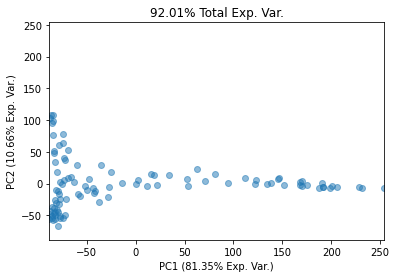

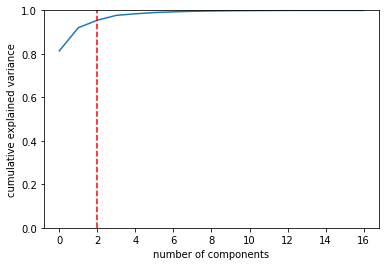

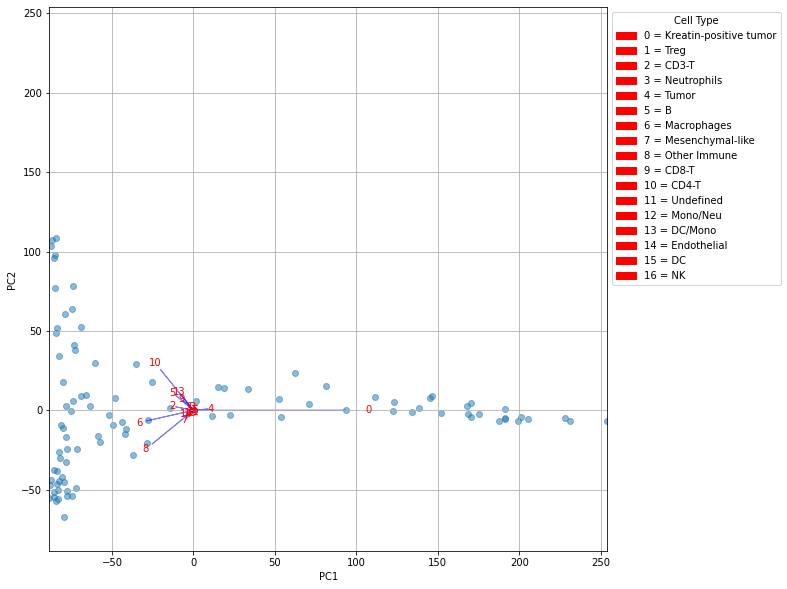

In [22]:
N_SITE = 100
PATIENT_ID = 4
RADIUS = 100
CELL_TYPES = ['Kreatin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
METHOD = 'abs'
PCA_SCALED = False
cell_ab = CellAbundance(PATIENT_ID, N_SITE, RADIUS, CELL_TYPES, method=METHOD, random_seed=42)
pc = cell_ab.perform_PCA(scale=PCA_SCALED)
plot_scatter_pca(pc, cell_ab.pca.explained_variance_ratio_)
plot_cumulative_explained_variance(cell_ab.pca.explained_variance_ratio_)
loadings = np.transpose(cell_ab.pca.components_[0:2, :])* np.sqrt(cell_ab.pca.explained_variance_[0:2])
biplot_PCA(pc, loadings, cell_type=CELL_TYPES)

In [4]:
patient_ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
N_SITE = 100
RADIUS = 100
SCALING = False

# Absolute Abundance Matrix Results

In [7]:
abs_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=1)

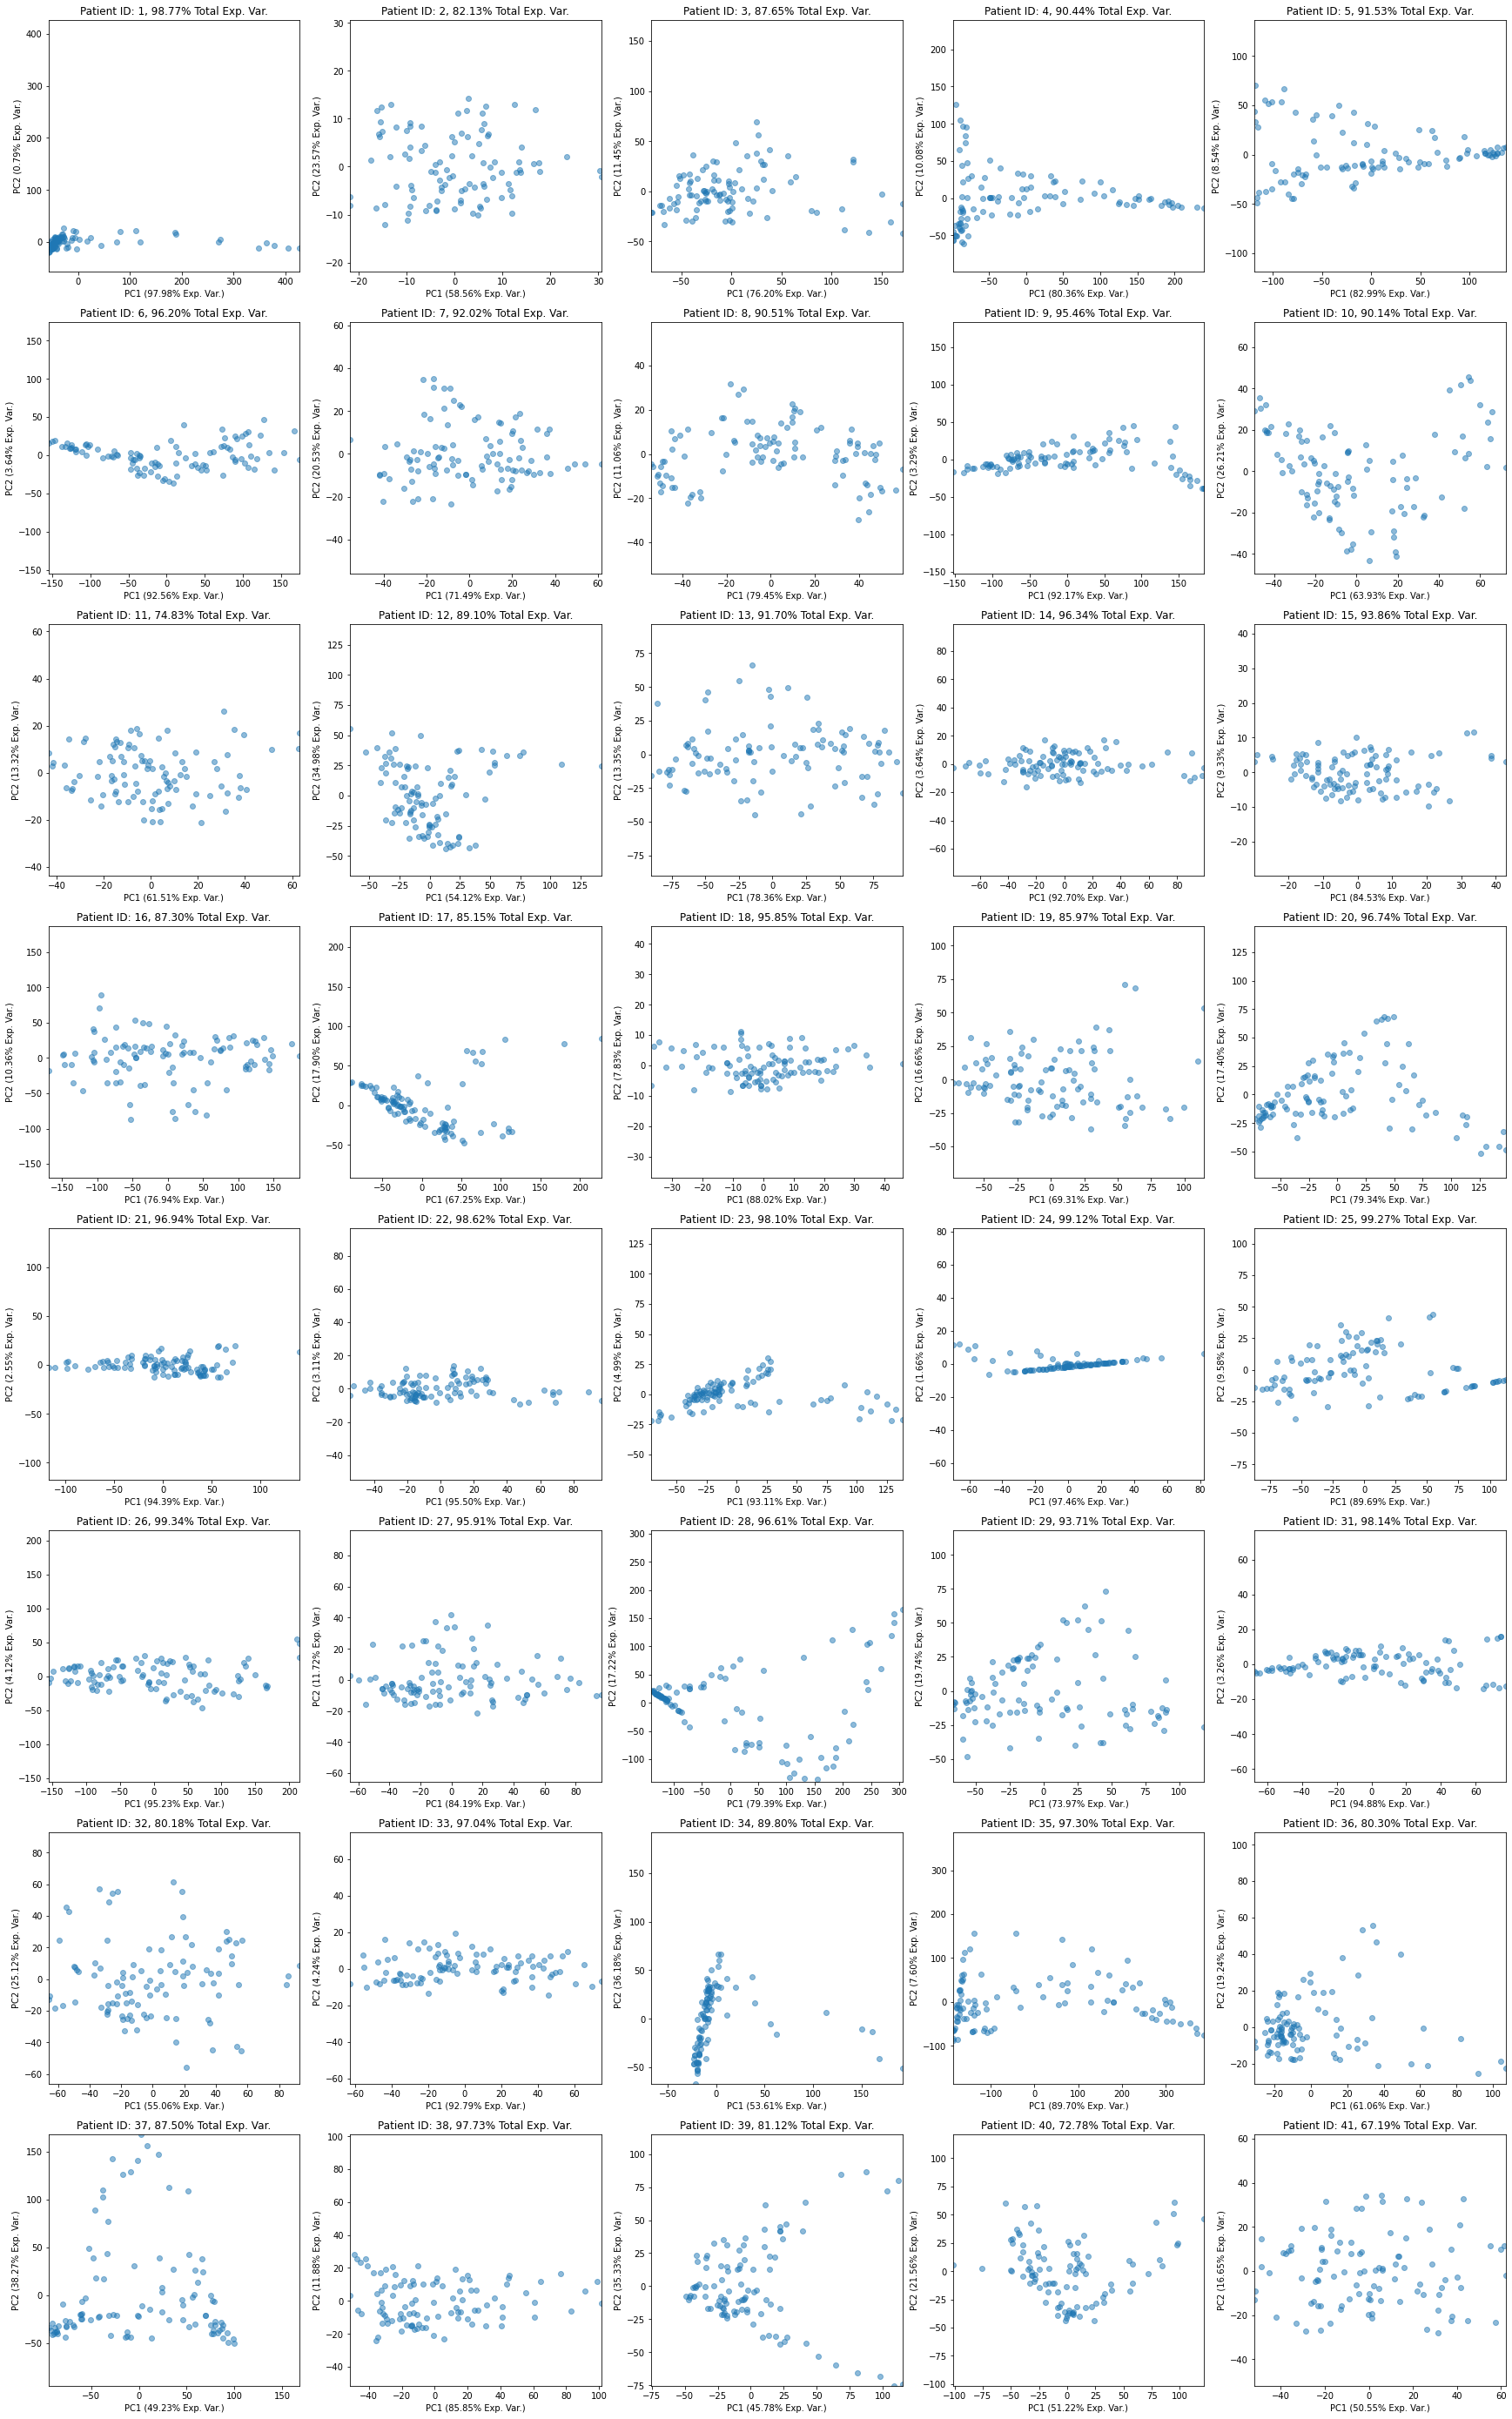

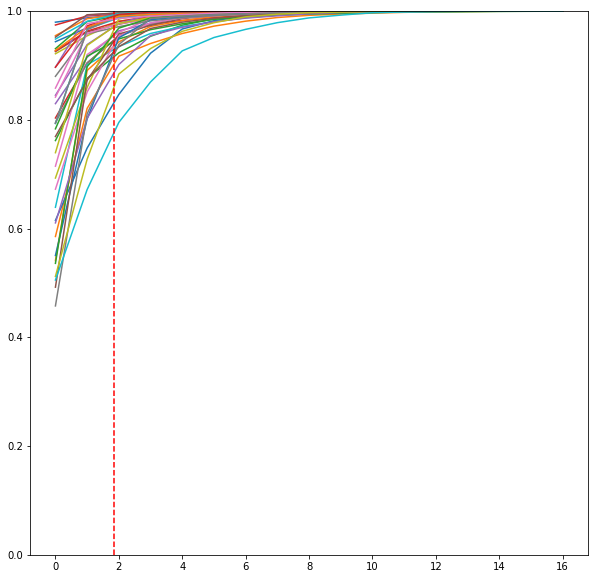

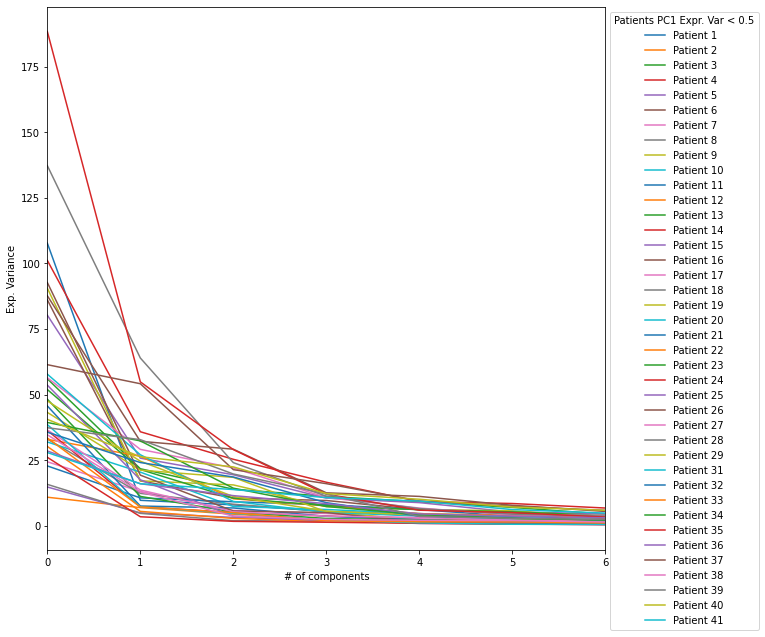

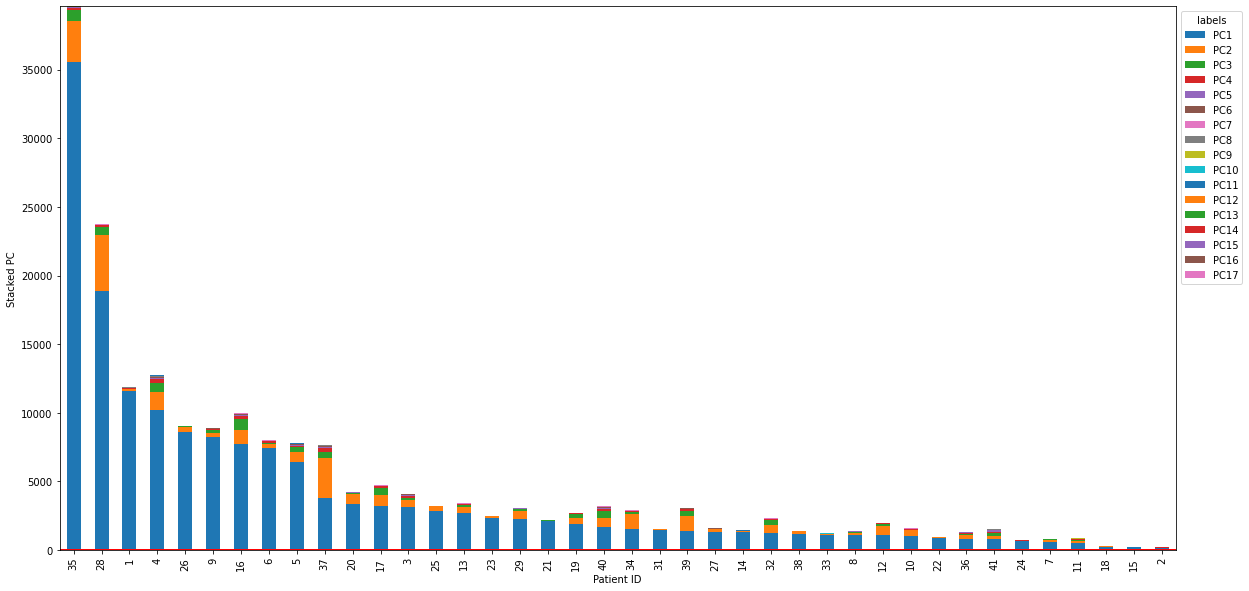

In [20]:
plot_PCAs(abs_ca_list, scale_pca=SCALING, fix_axis=False)
plot_CVEs(abs_ca_list, scale_pca=SCALING)
plot_exp_variance(abs_ca_list, scale_pca=SCALING)
plot_stacked_variance_PCA(abs_ca_list)

# Absolute Log Matrix Results ($SNR = 3$, $K = SNR ^ 2 = 9$) 

In [10]:
abs_log3_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs_log', snr=3)

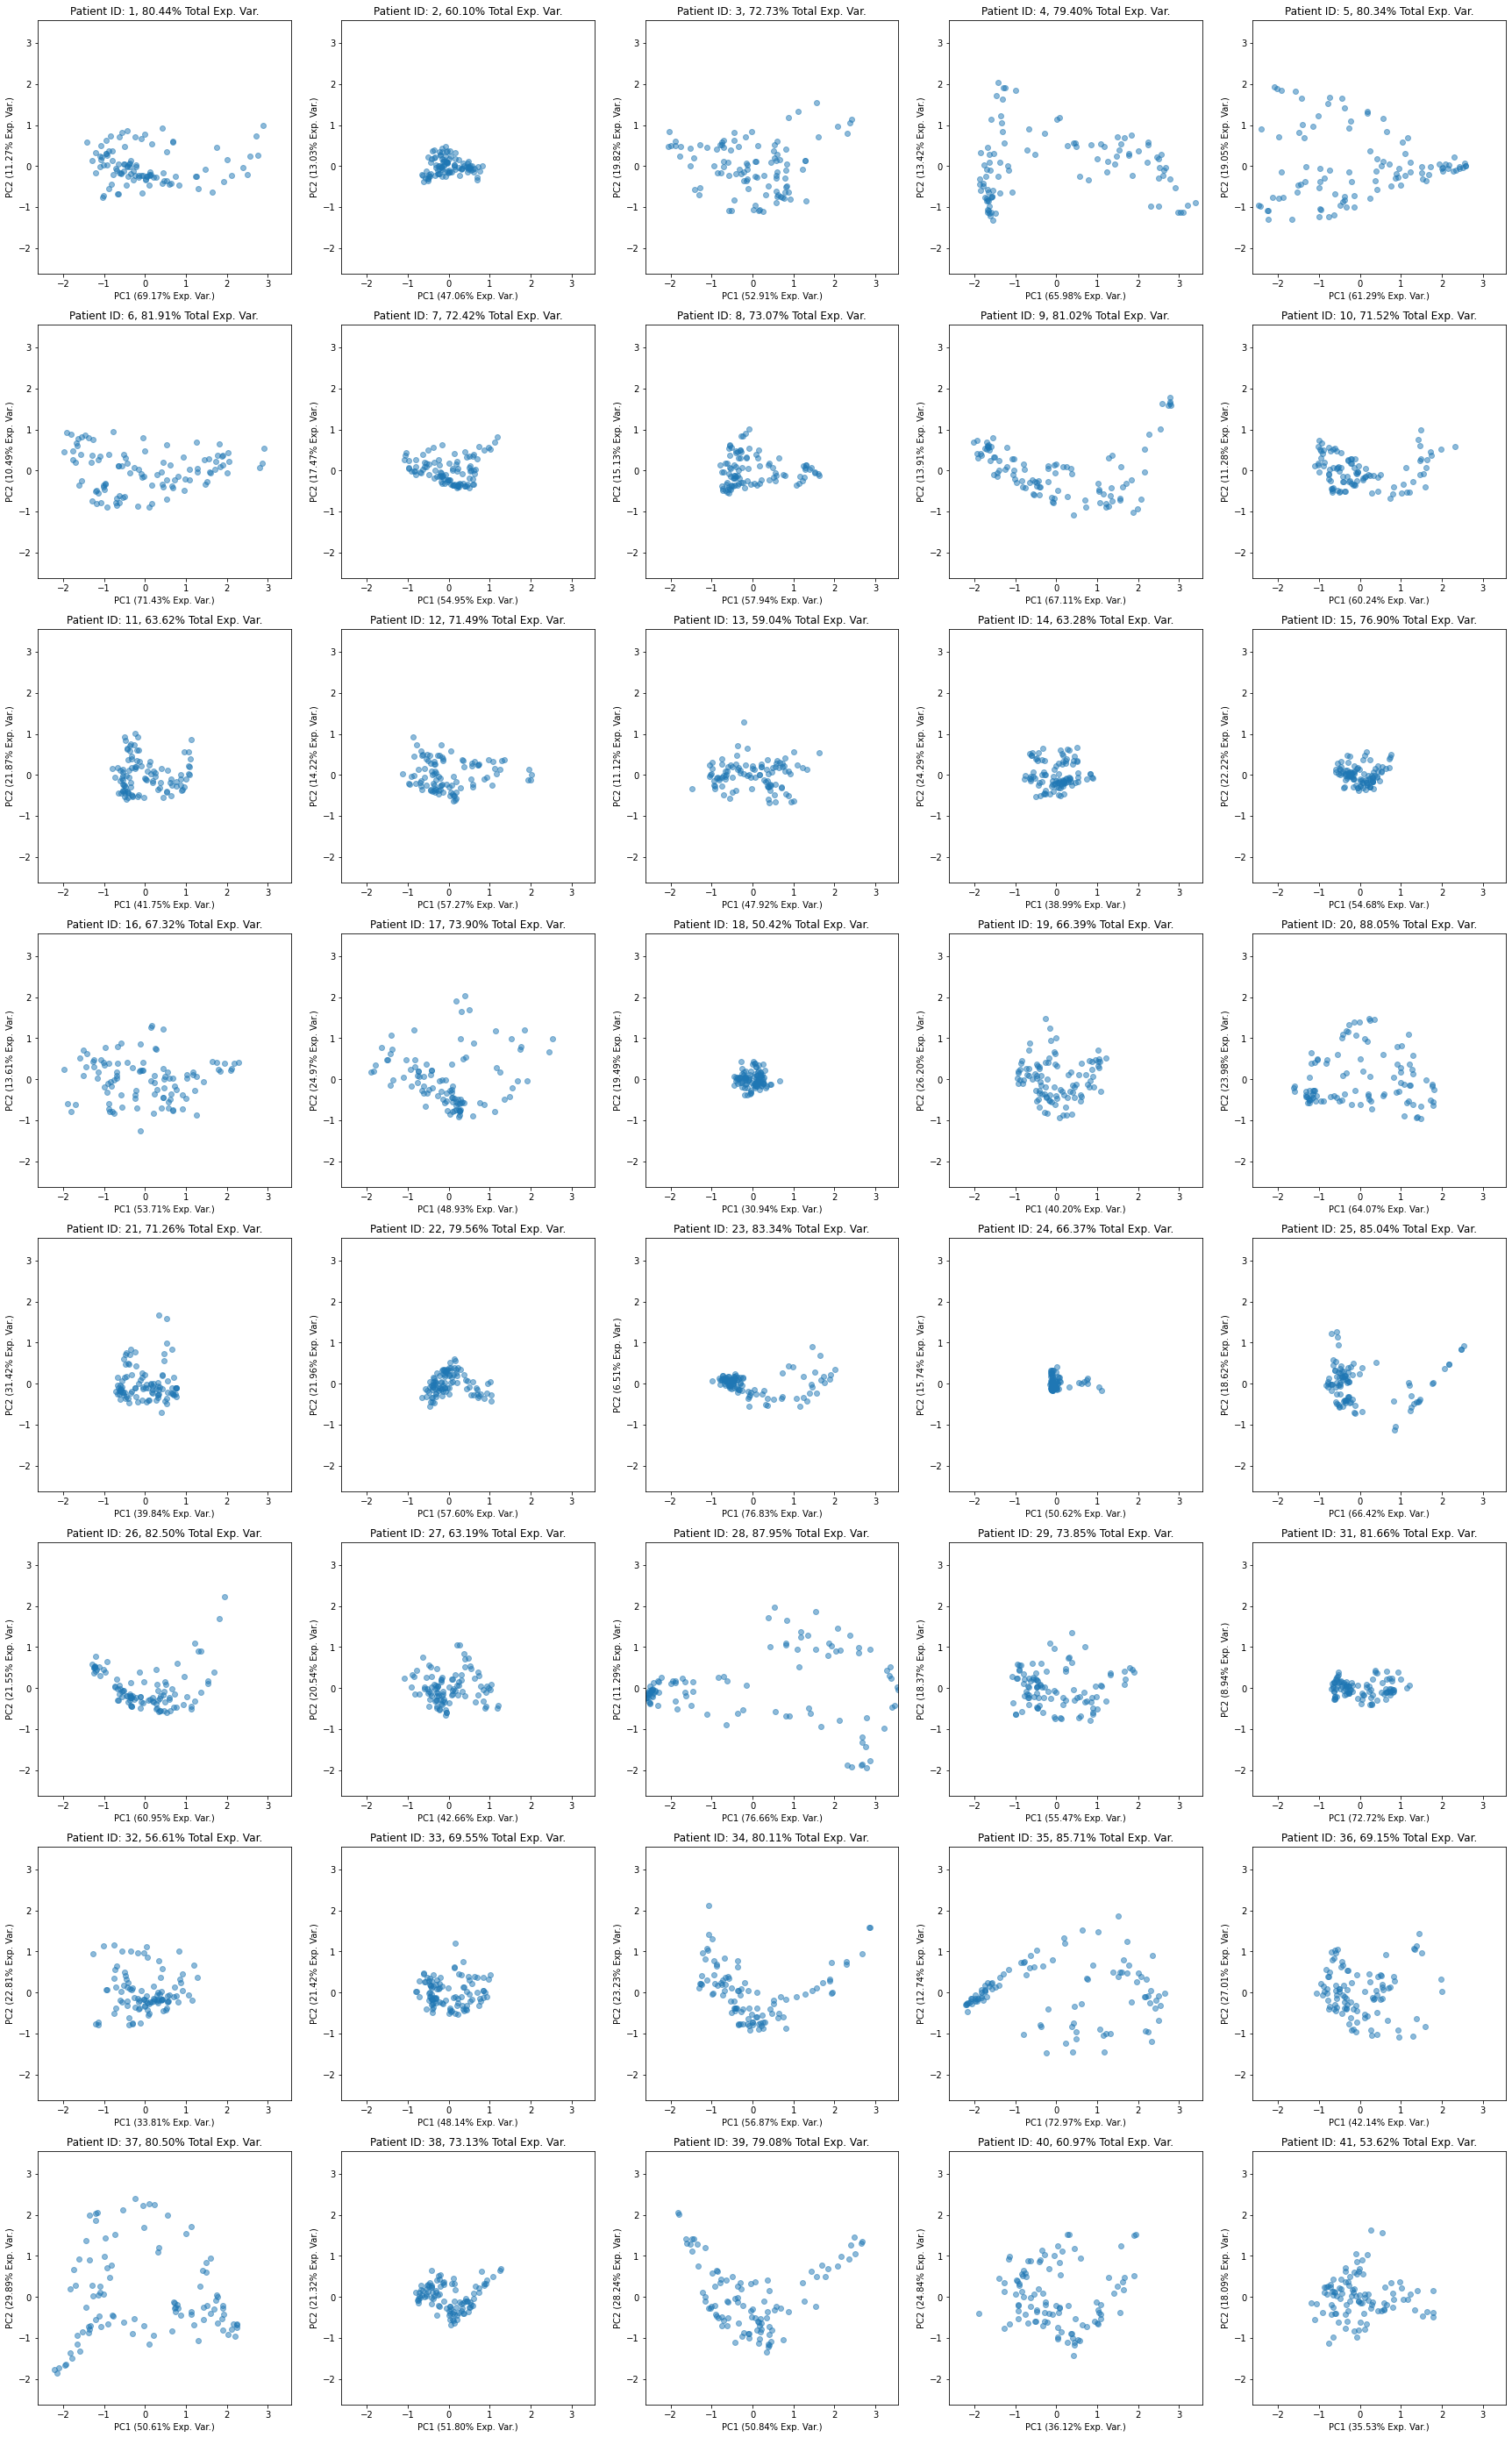

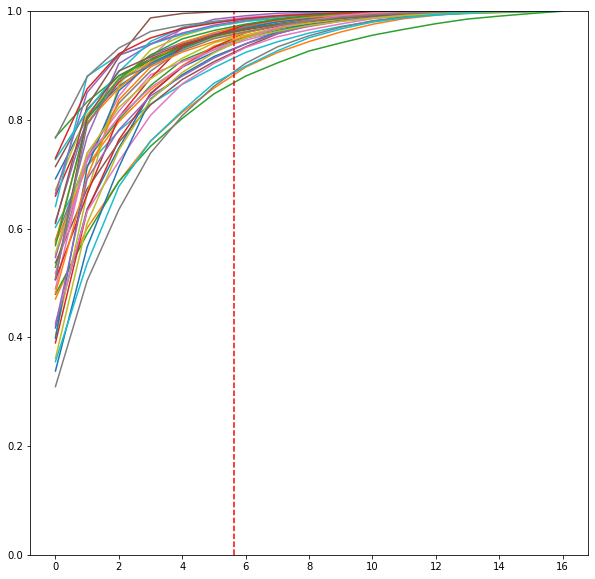

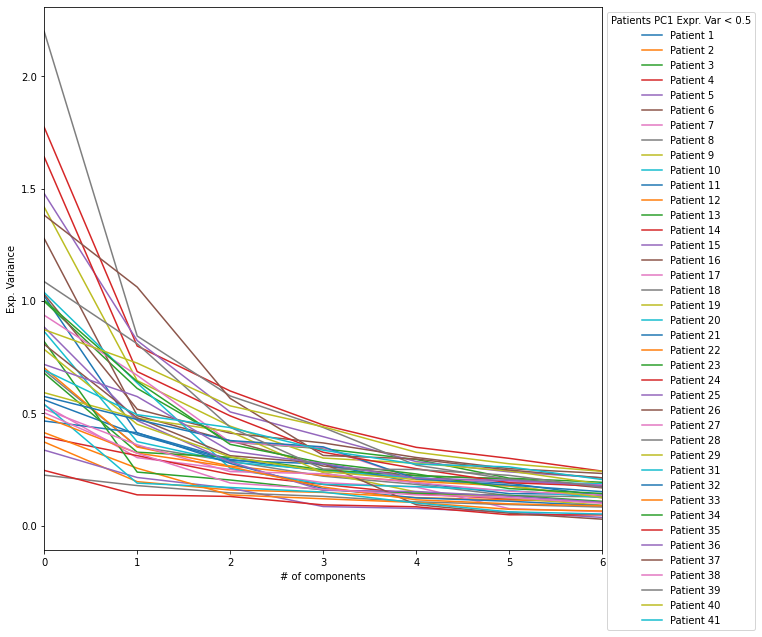

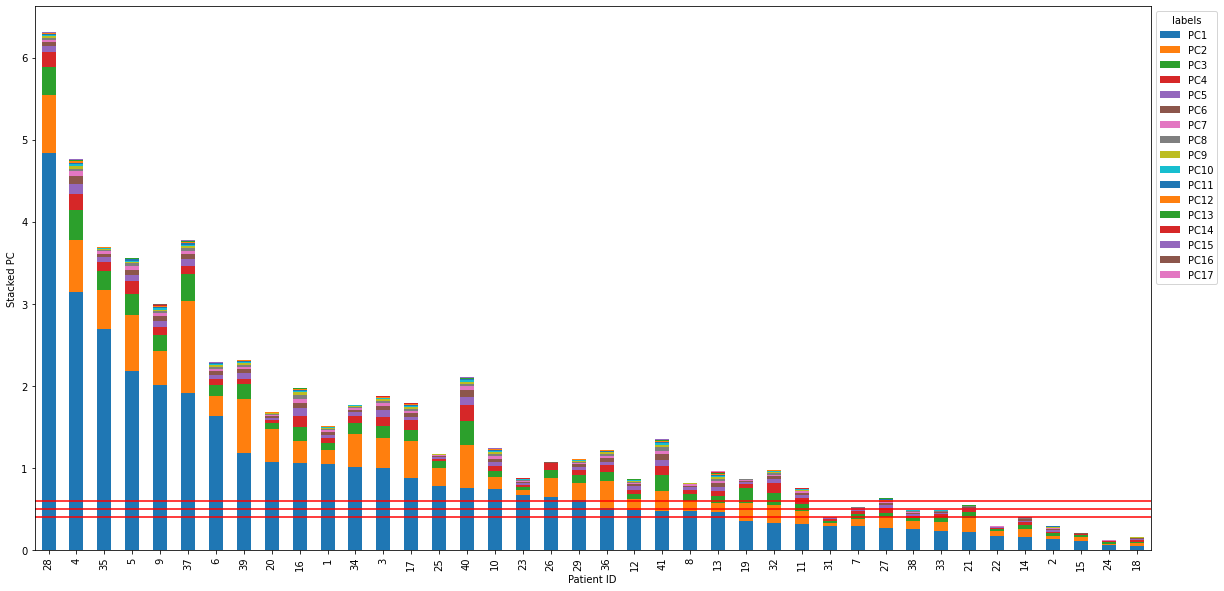

In [21]:
plot_PCAs(abs_log3_ca_list, scale_pca=SCALING, fix_axis=True)
plot_CVEs(abs_log3_ca_list, scale_pca=SCALING)
plot_exp_variance(abs_log3_ca_list, scale_pca=SCALING)
plot_stacked_variance_PCA(abs_log3_ca_list)